In [1]:
import numpy as np
import pickle
from pathlib import Path

from IPython.display import display
from lib.util_plot import *
from lib.constants import *
from lib.multilevel_analysis import *
from lib.pandas_impl import *
from lib.pandas_stats_VIS import *
from lib.matrix_analyzer import *
from lib.pandas_compute import *

import lib.FLY_preprocessing.fly_constants as FLY

### Data preparation

In [2]:
data_folder = Path.cwd() / 'data' / 'FLY'
meta_folder = data_folder / 'meta'
eval_folder = Path.cwd() / 'data' / 'eval' / 'FLY_optical'
eval_folder.mkdir(parents=True, exist_ok=True)
plot_folder = eval_folder / "plots"
plot_folder.mkdir(parents=True, exist_ok=True)

In [3]:
filename = eval_folder / "multilevel_analysis.pkl"
with open(filename, 'rb') as file:
    multilevel_analysis = pickle.load(file)

stats = multilevel_analysis.stats
df_summary = multilevel_analysis.df_summary

In [4]:
pre_ct_domain = [x for x in df_summary.index.get_level_values("pre_celltype").unique()]
post_ct_domain = [x for x in df_summary.index.get_level_values("post_celltype").unique()]

df_celltypes = pd.read_csv(meta_folder / "cell_types.csv")
ct_names_dict = df_celltypes.set_index("primary_type_id")["primary_type"].to_dict()

df_celltypes_optical = pd.read_csv(meta_folder / "selected_neurons_optical-lobes.csv")
ct_ids_optical = df_celltypes_optical["celltype_id"].unique().tolist()

In [5]:
pre_ids = set(df_summary.index.get_level_values("pre_id_mapped"))
post_ids = set(df_summary.index.get_level_values("post_id_mapped"))
all_ids = pre_ids.union(post_ids)
all_ids.remove(-1)   
no_presynaptic = all_ids - pre_ids

neuron_domain_pre = get_neuron_to_neuron_domain(df_summary, "pre_celltype", "post_celltype", \
                                                 celltype_order=None, ignored_neuron_ids=[-1])
neuron_domain_post = get_neuron_to_neuron_domain(df_summary, "pre_celltype", "post_celltype", \
                                                  celltype_order=None, ignored_neuron_ids=[-1])

In [6]:
initPlotSettings(False)

In [7]:
df_summary[(df_summary.index.get_level_values("pre_id_mapped") > -1) & (df_summary.index.get_level_values("post_id_mapped") > -1) & (df_summary[EMPIRICAL] > 0)]

model-null_group_index  \
pre_celltype post_celltype pre_id_mapped post_id_mapped overlap_volume                           
0            0             302           363            420                                420   
                           3895          668            737                                737   
                           10674         2772           49                                  49   
                           13890         1173           571                                571   
                           17009         2201           564                                564   
...                                                                                        ...   
739          636           21577         3261           5                                    5   
                           21863         2493           233                                233   
                           22340         8494           531                                531   
                           22358         8105           122                                122   
                           22683         10471          694                                694   

                                                                        empirical  \
pre_celltype post_celltype pre_id_mapped post_id_mapped overlap_volume              
0            0             302           363            420                   1.0   
                           3895          668            737                   1.0   
                           10674         2772           49                    1.0   
                           13890         1173           571                   1.0   
                           17009         2201           564                   1.0   
...                                                                           ...   
739          636           21577         3261           5                     1.0   
                           21863         2493           233                   1.0   
                           22340         8494           531                   1.0   
                           22358         8105           122                   1.0   
                           22683         10471          694                   1.0   

                                                                        model-null  \
pre_celltype post_celltype pre_id_mapped post_id_mapped overlap_volume               
0            0             302           363            420               0.030387   
                           3895          668            737               0.023392   
                           10674         2772           49                0.032663   
                           13890         1173           571               0.034392   
                           17009         2201           564               0.041801   
...                                                                            ...   
739          636           21577         3261           5                 0.006173   
                           21863         2493           233               0.005391   
                           22340         8494           531               0.009646   
                           22358         8105           122               0.006410   
                           22683         10471          694               0.009709   

                                                                        num_synaptic_pairs  \
pre_celltype post_celltype pre_id_mapped post_id_mapped overlap_volume                       
0            0             302           363            420                           11.0   
                           3895          668            737                            8.0   
                           10674         2772           49                            13.0   
                           13890         1173           571                           13.0   
        

In [8]:
row_markers = {
    "pre_celltype" : [6] # 6,T5b
}
col_markers = {
    "post_celltype" : [6] # 6,T5b
}

### Overlapping/connected matrix

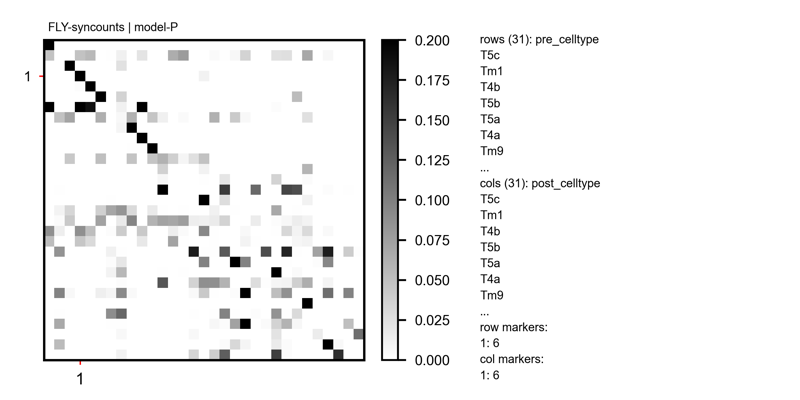

<Figure size 640x480 with 0 Axes>

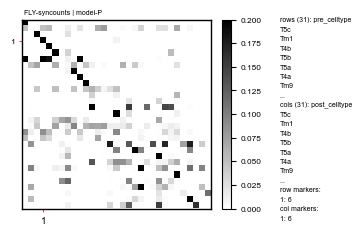

In [29]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
#matrix_analyzer.set_selection(include_filter_and={
#    "overlap_volume" : [100]
#})
matrix_analyzer.set_data_columns(MODEL_P)
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["post_celltype"],    
                             row_domains = ct_ids_optical,  
                             col_domains = ct_ids_optical,
                             value_label_map = {
                                 "pre_celltype" : ct_names_dict,
                                 "post_celltype" : ct_names_dict
                             },
                             aggregation_fn="mean",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-syncounts", 
                              colormap_name="binary", vmin=0, vmax=0.2, normalization_function=None, 
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=False, row_separator_lines=False, high_res=False)

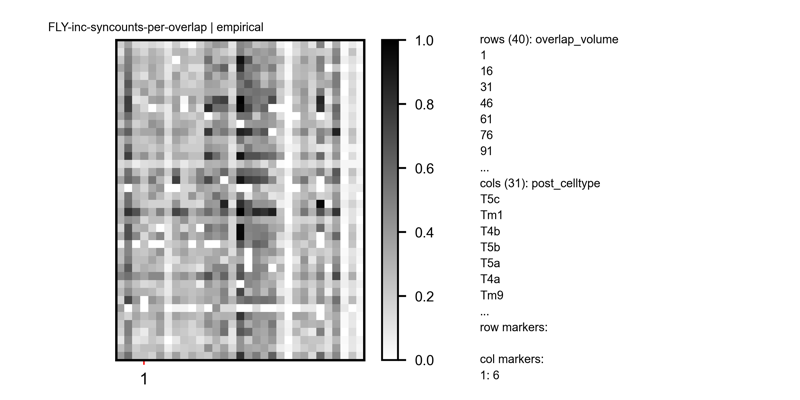

<Figure size 640x480 with 0 Axes>

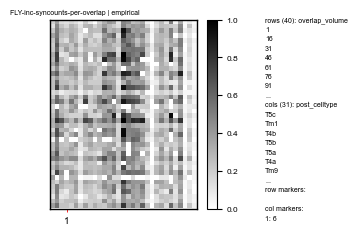

In [48]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
matrix_analyzer.set_data_columns(EMPIRICAL)
matrix_analyzer.build_matrix(["overlap_volume"], 
                             ["post_celltype"],    
                             row_domains = np.arange(1,600,15).tolist(),
                             col_domains = ct_ids_optical,
                             value_label_map = {
                                 "pre_celltype" : ct_names_dict,
                                 "post_celltype" : ct_names_dict
                             },
                             aggregation_fn="mean",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-inc-syncounts-per-overlap", 
                              colormap_name="binary", vmin=0, vmax=1, normalization_function=None, 
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=False, row_separator_lines=False, high_res=False)

### Specificity parameters matrix

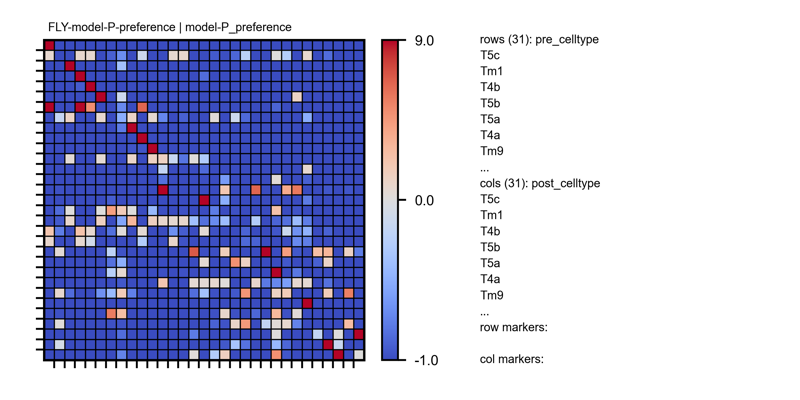

<Figure size 640x480 with 0 Axes>

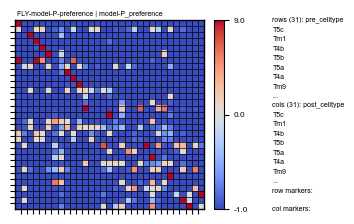

In [13]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
#matrix_analyzer.set_selection(include_filter_and={
#    "overlap_volume" : [101]
#})
matrix_analyzer.set_data_columns("model-P_preference")
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["post_celltype"],    
                             row_domains = ct_ids_optical,  
                             col_domains = ct_ids_optical,
                             value_label_map = {
                                 "pre_celltype" : ct_names_dict,
                                 "post_celltype" : ct_names_dict
                             },
                             aggregation_fn="mean",
                             default_value=1)
matrix_analyzer.render_matrix("FLY-model-P-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 10),
                              col_separator_lines=True, row_separator_lines=True, high_res=False)